In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Kiểm tra dữ liệu

In [2]:
test=pd.read_csv("test.csv")
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.shape

(19765, 127)

In [4]:
test.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
count,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,...,19765.000000,19765.000000,19765.00000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000
mean,39772.653883,1.024994,24.321730,0.324381,2.006527,2.655755,1.043410,0.414901,0.705846,0.292557,...,0.013964,0.057324,0.01108,0.045231,0.010068,0.008247,0.013559,0.008601,0.018315,0.056312
std,22942.157493,0.156110,5.184879,0.279439,0.080526,0.754993,0.291445,0.200997,0.074497,0.090343,...,0.117345,0.232466,0.10468,0.207817,0.099837,0.090440,0.115655,0.092345,0.134092,0.230528
min,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.345455,0.083682,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19792.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.253731,0.654545,0.225941,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39898.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.417910,0.709091,0.288703,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59758.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.582090,0.763636,0.345188,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79129.000000,2.000000,37.000000,1.000000,3.000000,3.000000,3.000000,0.970149,1.000000,0.878661,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 127 entries, Id to Medical_Keyword_48
dtypes: float64(18), int64(108), object(1)
memory usage: 19.2+ MB


In [6]:
train=pd.read_csv("train.csv")
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [7]:
train.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [9]:
train.shape

(59381, 128)

In [10]:
#Kiểm tra biến Response trong tệp train
train.groupby('Response').count()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Response,,,,,,,,,,,,,,,,,,,,,
1,6207,6207,6207,6207,6207,6207,6207,6207,6207,6207,...,6207,6207,6207,6207,6207,6207,6207,6207,6207,6207
2,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,...,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552
3,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,...,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013
4,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,...,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428
5,5432,5432,5432,5432,5432,5432,5432,5432,5432,5432,...,5432,5432,5432,5432,5432,5432,5432,5432,5432,5432
6,11233,11233,11233,11233,11233,11233,11233,11233,11233,11233,...,11233,11233,11233,11233,11233,11233,11233,11233,11233,11233
7,8027,8027,8027,8027,8027,8027,8027,8027,8027,8027,...,8027,8027,8027,8027,8027,8027,8027,8027,8027,8027
8,19489,19489,19489,19489,19489,19489,19489,19489,19489,19489,...,19489,19489,19489,19489,19489,19489,19489,19489,19489,19489


#Tổng quan dữ liệu:
- Tệp test : 19765 dòng dữ liệu
- Tệp train : 59381 dòng dữ liệu
- Dữ liệu tệp train biến Response trả về 8 mức độ rủi ro trong bảo hiểm và rủi ro mức 8 đang chiếm đến 19489 dòng dữ liệu.

# Áp dụng mô hình logistic trước khi tách biến

In [4]:
train_bandau = pd.read_csv('train_bandau.csv')
train_bandau.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [5]:
train_bandau.isna()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59377,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#Phần trăm hóa các biến chứa nan
def missing_data(train_bandau):
    total = train_bandau.isnull().sum()
    percent = (train_bandau.isnull().sum()/train_bandau.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in train_bandau.columns:
        dtype = str(train_bandau[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt

In [7]:
missing_data(train_bandau)['Percent'].sort_values(ascending=False)

Medical_History_10    99.061990
Medical_History_32    98.135767
Medical_History_24    93.598963
Medical_History_15    75.101463
Family_Hist_5         70.411411
                        ...    
Medical_History_6      0.000000
Medical_History_5      0.000000
Medical_History_4      0.000000
Medical_History_3      0.000000
Response               0.000000
Name: Percent, Length: 128, dtype: float64

In [8]:
train_bandau=train_bandau[train_bandau.columns[train_bandau.isnull().mean() <= 0.75]]

In [18]:
missing_data(train_bandau)['Percent'].sort_values(ascending=False)

Id                    0.0
Medical_Keyword_4     0.0
Medical_Keyword_17    0.0
Medical_Keyword_16    0.0
Medical_Keyword_15    0.0
                     ... 
Family_Hist_4         0.0
Family_Hist_3         0.0
Family_Hist_2         0.0
Family_Hist_1         0.0
Response              0.0
Name: Percent, Length: 124, dtype: float64

In [11]:
train_bandau['Employment_Info_1'].fillna(train_bandau['Employment_Info_1'].mean(), inplace=True)
train_bandau['Employment_Info_4'].fillna(train_bandau['Employment_Info_4'].mean(), inplace=True)
train_bandau['Employment_Info_6'].fillna(train_bandau['Employment_Info_6'].mean(), inplace=True)
train_bandau['Insurance_History_5'].fillna(train_bandau['Insurance_History_5'].mean(), inplace=True)
train_bandau['Family_Hist_2'].fillna(train_bandau['Family_Hist_2'].mean(), inplace=True)
train_bandau['Family_Hist_3'].fillna(train_bandau['Family_Hist_3'].mean(), inplace=True)
train_bandau['Family_Hist_4'].fillna(train_bandau['Family_Hist_4'].mean(), inplace=True)
train_bandau['Family_Hist_5'].fillna(train_bandau['Family_Hist_5'].mean(), inplace=True)
train_bandau['Medical_History_1'].fillna(train_bandau['Medical_History_1'].mean(), inplace=True)

In [15]:
X_bandau = train_bandau.drop({'Response','Id','Product_Info_2'}, axis =1)
y_bandau = train_bandau['Response']

In [16]:
# Tách dữ liệu
X_train_bandau, X_test_bandau, y_train_bandau, y_test_bandau = train_test_split(X_bandau, y_bandau, test_size=0.3, random_state=200)

# Huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train_bandau, y_train_bandau)
model.coef_

C:\Users\Window 11\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 4.00269268e-04,  5.19555129e-02, -8.10800114e-03,
         2.11762293e-03,  6.23411185e-03,  1.38596329e-03,
         1.05401885e-02,  1.82037951e-03,  3.86793947e-03,
         5.42276707e-03, -8.96873907e-04, -7.92827533e-02,
         2.66882601e-02,  2.91277373e-04,  8.44389006e-04,
        -1.29205805e-05, -2.00155696e-03,  4.01504909e-03,
         1.65351732e-02,  1.66769532e-03,  9.99320928e-03,
        -1.00894883e-02,  8.83422540e-03,  3.31043829e-03,
         1.25165756e-02, -6.52199817e-03,  8.21100982e-03,
        -3.00026061e-05,  1.14413228e-02,  2.56895197e-04,
         7.04249244e-03, -2.35075364e-03,  1.54754585e-03,
         1.14287884e-03,  2.57881648e-03,  8.82544820e-04,
        -5.71053781e-02, -4.97858693e-04,  2.66889460e-03,
        -1.19483795e-02,  1.68904408e-03, -1.14112158e-02,
        -1.52821608e-04,  5.92268512e-03, -4.40672875e-03,
         2.21447573e-03,  7.46983946e-03, -2.12162487e-02,
         1.49904591e-03,  2.30948458e-02,  3.11116654e-0

In [17]:
prediction = model.predict(X_test_bandau)
print('Accuracy score:', accuracy_score(y_test_bandau, prediction))
print('Confusion matrix:')
print(confusion_matrix(y_test_bandau, prediction))

Accuracy score: 0.3622228459163626
Confusion matrix:
[[ 351    3    0    0    0  345    0 1148]
 [ 256    5    0    0    0  409    1 1292]
 [  20    0    0    0    0   40    0  255]
 [  23    0    0    0    0   37    0  360]
 [ 132    0    0    0    0  211    1 1286]
 [ 221    1    0    0    0  478    0 2713]
 [ 169    0    0    0    0  354    3 1849]
 [ 130    0    0    0    0  106    0 5616]]


# Làm sạch, Tiền xử lý dữ liệu

<Axes: xlabel='Response', ylabel='Count'>

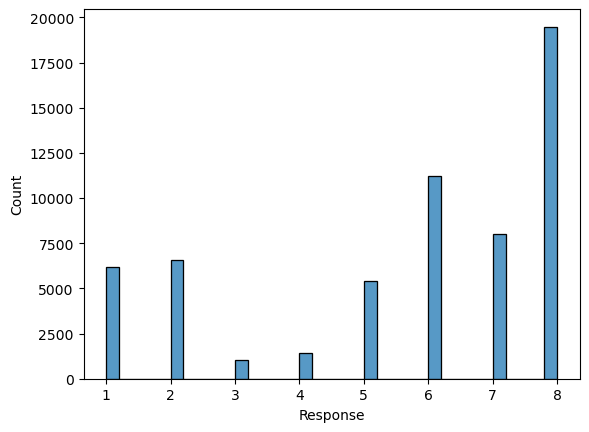

In [11]:
#Trực quan hóa biến Response
sns.histplot(data = train, x= 'Response')

In [12]:
# Kiểm tra các biến trống isna()
train.isna().sum().sort_values(ascending = False)

Medical_History_10    58824
Medical_History_32    58274
Medical_History_24    55580
Medical_History_15    44596
Family_Hist_5         41811
                      ...  
Medical_History_6         0
Medical_History_5         0
Medical_History_4         0
Medical_History_3         0
Response                  0
Length: 128, dtype: int64

In [13]:
#Phần trăm hóa các biến chứa nan
def missing_data(train):
    total = train.isnull().sum()
    percent = (train.isnull().sum()/train.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in train.columns:
        dtype = str(train[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt

In [14]:
missing_data(train)['Percent'].sort_values(ascending=False)

Medical_History_10    99.061990
Medical_History_32    98.135767
Medical_History_24    93.598963
Medical_History_15    75.101463
Family_Hist_5         70.411411
                        ...    
Medical_History_6      0.000000
Medical_History_5      0.000000
Medical_History_4      0.000000
Medical_History_3      0.000000
Response               0.000000
Name: Percent, Length: 128, dtype: float64

In [15]:
# Xóa các cột có biến trống  >75%
train=train[train.columns[train.isnull().mean() <= 0.75]]

# Giải thích: 
- Xóa các cột trên 75% vì: Các cột này thiếu quá nhiều dữ liệu ( max lên đến 99%) vì vậy loại bỏ cột này
- Trên 75% chỉ có 4 cột bị xóa bỏ so với 128 cột dữ liệu sẽ không qua ảnh hưởng đến tệp 

In [16]:
#Kiểm tra lại sau khi đã xóa
train.isnull().sum().sort_values(ascending=False)

Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
                       ...  
Medical_History_6          0
Medical_History_5          0
Medical_History_4          0
Medical_History_3          0
Response                   0
Length: 124, dtype: int64

In [17]:
#In ra các cột vẫn chứa biến trống (<75%)
list_data=train.columns[train.isna().any()].tolist()
for i in range(0,len(list_data)):
    print('column name: ',list_data[i],' Dtype:',train[list_data[i]].dtypes)

column name:  Employment_Info_1  Dtype: float64
column name:  Employment_Info_4  Dtype: float64
column name:  Employment_Info_6  Dtype: float64
column name:  Insurance_History_5  Dtype: float64
column name:  Family_Hist_2  Dtype: float64
column name:  Family_Hist_3  Dtype: float64
column name:  Family_Hist_4  Dtype: float64
column name:  Family_Hist_5  Dtype: float64
column name:  Medical_History_1  Dtype: float64


In [18]:
#Điền giá trị mean vào tất cả chỗ trống trong cột
train['Employment_Info_1'].fillna(train['Employment_Info_1'].mean(), inplace=True)
train['Employment_Info_4'].fillna(train['Employment_Info_4'].mean(), inplace=True)
train['Employment_Info_6'].fillna(train['Employment_Info_6'].mean(), inplace=True)
train['Insurance_History_5'].fillna(train['Insurance_History_5'].mean(), inplace=True)
train['Family_Hist_2'].fillna(train['Family_Hist_2'].mean(), inplace=True)
train['Family_Hist_3'].fillna(train['Family_Hist_3'].mean(), inplace=True)
train['Family_Hist_4'].fillna(train['Family_Hist_4'].mean(), inplace=True)
train['Family_Hist_5'].fillna(train['Family_Hist_5'].mean(), inplace=True)
train['Medical_History_1'].fillna(train['Medical_History_1'].mean(), inplace=True)

# Giải thích: 
- Chủ yếu các giá trị trong bảng này đều dưới 10. Nên khi điền giá trị mean() nó không ảnh hưởng quá lớn đến tệp ban đầu.
- Khi điền mean() cũng giúp cân bằng được dữ liệu 

# Khai phá dữ liệu

In [19]:
from sklearn.preprocessing import LabelEncoder

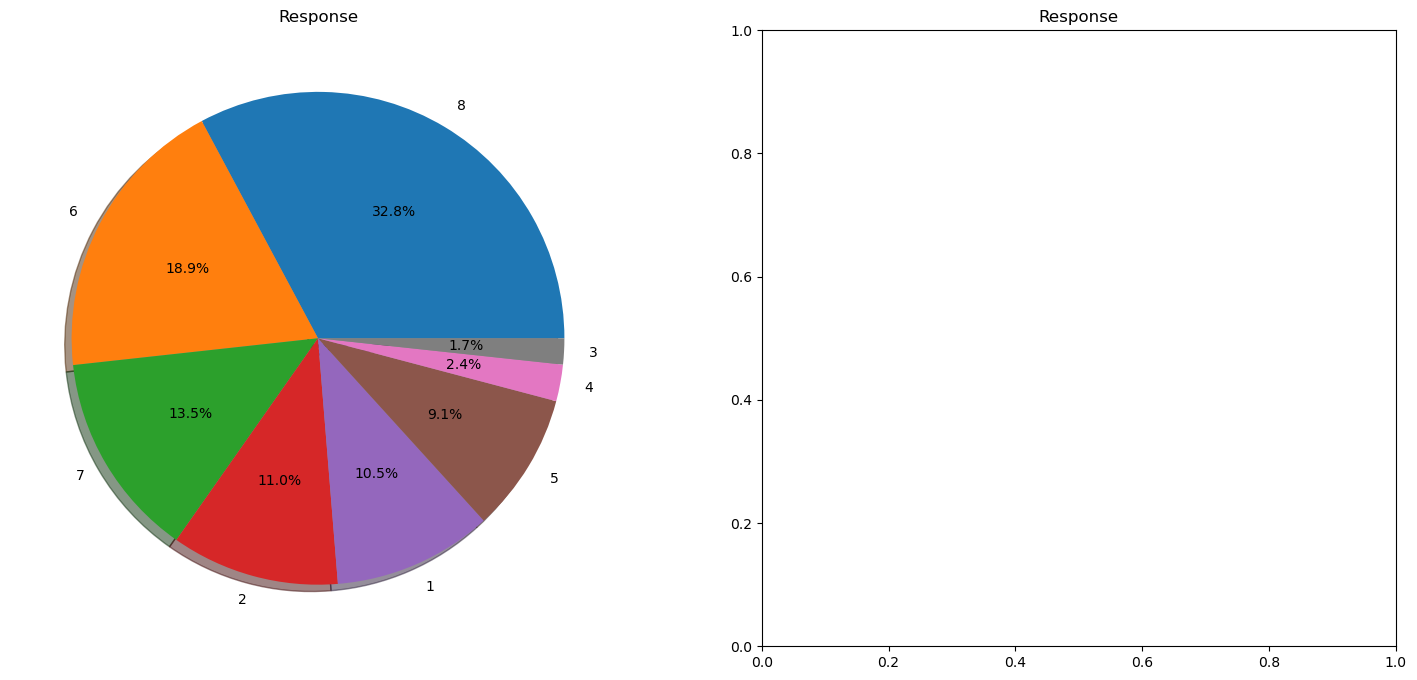

In [20]:
#Trực quan hóa biến Response bằng biểu đồ pie
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
#sns.countplot('Response',data=train,ax=ax[1])
ax[1].set_title('Response')
plt.show()

# Nhận xét
- Mức độ 8 đang chiếm ưu thế lên đến 32.8%
- Chia làm 2 nhóm: 
    - Nhóm 0 (Không chấp nhận): Mức từ 1 đến 7
    - Nhóm 1 (Chấp nhận): Mức 8

In [21]:
#Ghép Response = 1 đến 7 là 1 nhóm, Response = 8 là 1 nhóm
def new_target(row):
    if (row['Response']<=7) & (row['Response']>=0):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=-1
    return val


In [22]:
#Copy 1 data mới theo dữ liệu ban đầu
new_data = train.copy()
new_data['Final_Response']=new_data.apply(new_target,axis=1)

In [23]:
new_data['Final_Response'].value_counts()

0    39892
1    19489
Name: Final_Response, dtype: int64

<Axes: xlabel='Final_Response', ylabel='count'>

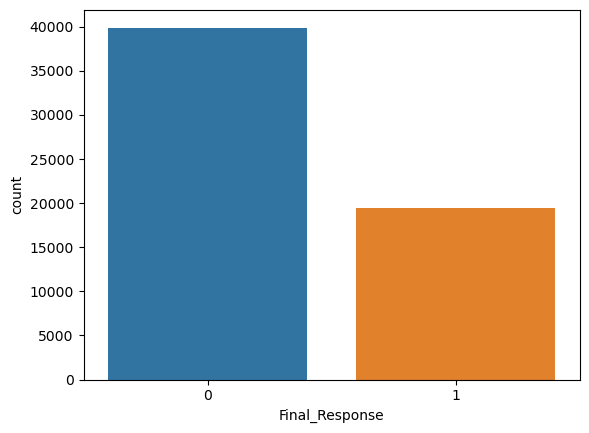

In [24]:
#Trực quan hóa sau khi ghép nhóm
sns.countplot(data= new_data, x= 'Final_Response')

# Nhận xét
- Nhóm 0: chiếm gần 40000 tệp dữ liệu khoảng 67%
- Nhóm 1: Chiếm gần 20000 tệp dữ liệu khoảng 33%

    -> Nhóm 0 gần gấp đôi Nhóm 1

In [25]:
new_data.drop(['Response'],axis=1,inplace=True)
train=new_data
del new_data

In [26]:
#Đổi cột Final_Response thành Response trong train
train.rename(columns={'Final_Response':'Response'},inplace=True)

In [27]:
# BMI, AGE, HEIGHT and WEIGHT chia thành các giá trị thấp, trung bình và cao sau khi chia thành nhóm (0,1)
# BMI 
conditions = [
    (train['BMI'] <= train['BMI'].quantile(0.25)),
    (train['BMI'] > train['BMI'].quantile(0.25)) & (train['BMI'] <= train['BMI'].quantile(0.75)),
    (train['BMI'] > train['BMI'].quantile(0.75))]

choices = ['under_weight', 'average', 'overweight']

train['BMI_Wt'] = np.select(conditions, choices)

# Age 
conditions = [
    (train['Ins_Age'] <= train['Ins_Age'].quantile(0.25)),
    (train['Ins_Age'] > train['Ins_Age'].quantile(0.25)) & (train['Ins_Age'] <= train['Ins_Age'].quantile(0.75)),
    (train['Ins_Age'] > train['Ins_Age'].quantile(0.75))]

choices = ['young', 'average', 'old']
train['Old_Young'] = np.select(conditions, choices)

# Height 
conditions = [
    (train['Ht'] <= train['Ht'].quantile(0.25)),
    (train['Ht'] > train['Ht'].quantile(0.25)) & (train['Ht'] <= train['Ht'].quantile(0.75)),
    (train['Ht'] > train['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

train['Short_Tall'] = np.select(conditions, choices)

# Weight 
conditions = [
    (train['Wt'] <= train['Wt'].quantile(0.25)),
    (train['Wt'] > train['Wt'].quantile(0.25)) & (train['Wt'] <= train['Wt'].quantile(0.75)),
    (train['Wt'] > train['Wt'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

train['Thin_Fat'] = np.select(conditions, choices)

- Các chỉ số bất thường như quá cao hoặc quá thấp chủ yếu nằm ở nhóm 8, vì vậy nên tách thành 2 nhóm để phân tích

# Trực quan hóa

<Axes: xlabel='BMI_Wt', ylabel='count'>

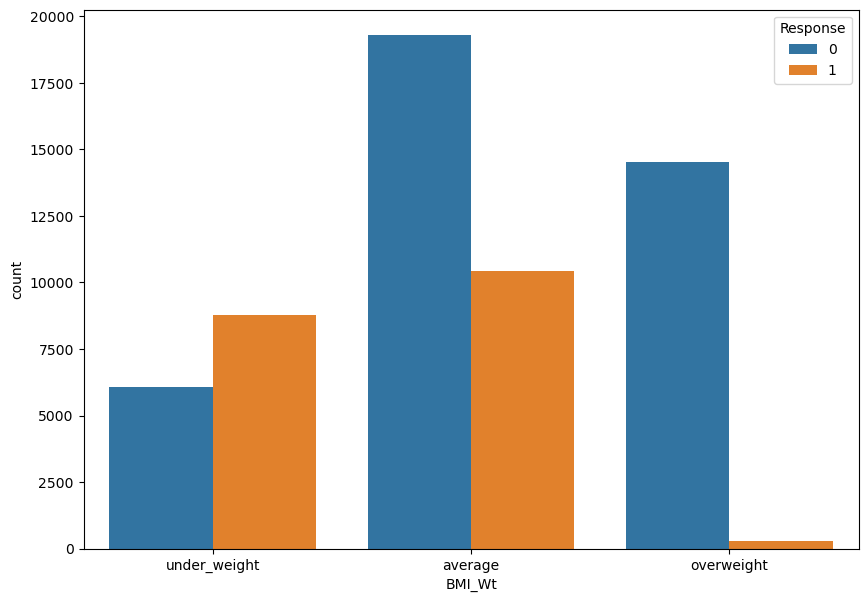

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'BMI_Wt', hue = 'Response', data = train)

Hầu hết những người thừa cân (BMI cao) đều không được chấp nhận hợp đồng bảo hiểm

<Axes: xlabel='Old_Young', ylabel='count'>

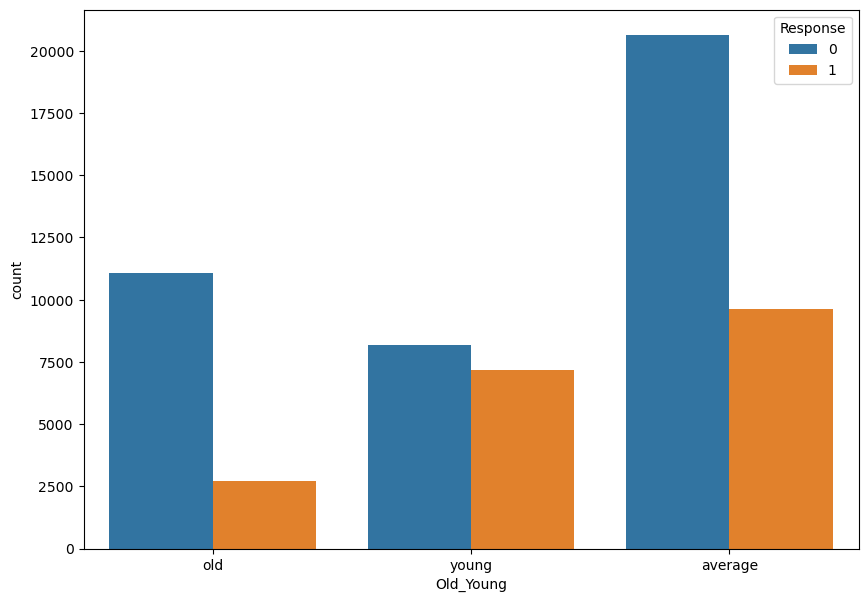

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Old_Young', hue = 'Response', data = train)

- Hầu hết những người tuổi già đều không được chấp nhận hợp đồng so với tuổi trẻ và trung bình
- Hầu hết ở độ tuổi trung bình cũng không được chấp nhận hợp đồng có thể vì lí do, tính năng khác của dữ liệu

<Axes: xlabel='Short_Tall', ylabel='count'>

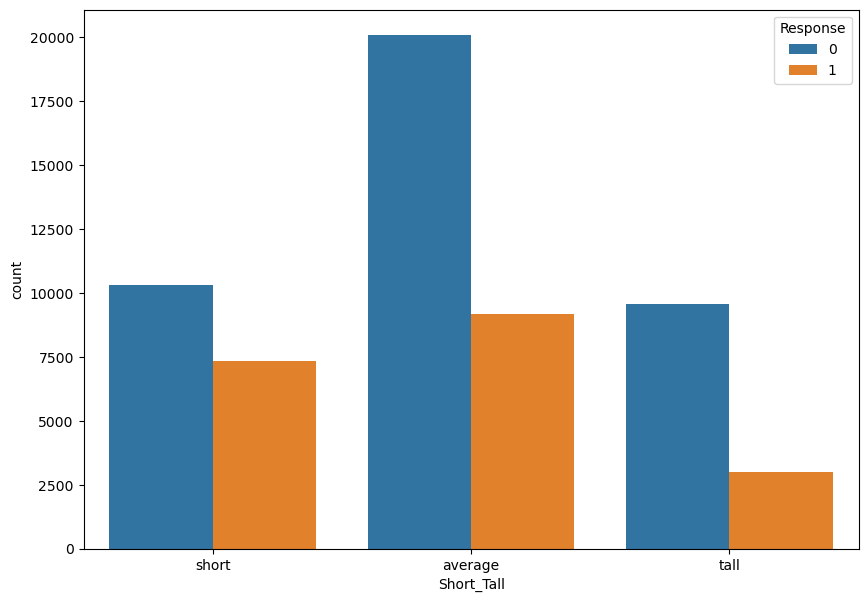

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Short_Tall', hue = 'Response', data = train)

- ở biểu đồ này, Cao hay Thấp đều không biểu hiện rõ về việc có chấp nhận hay không chấp nhận hợp đồng

<Axes: xlabel='Thin_Fat', ylabel='count'>

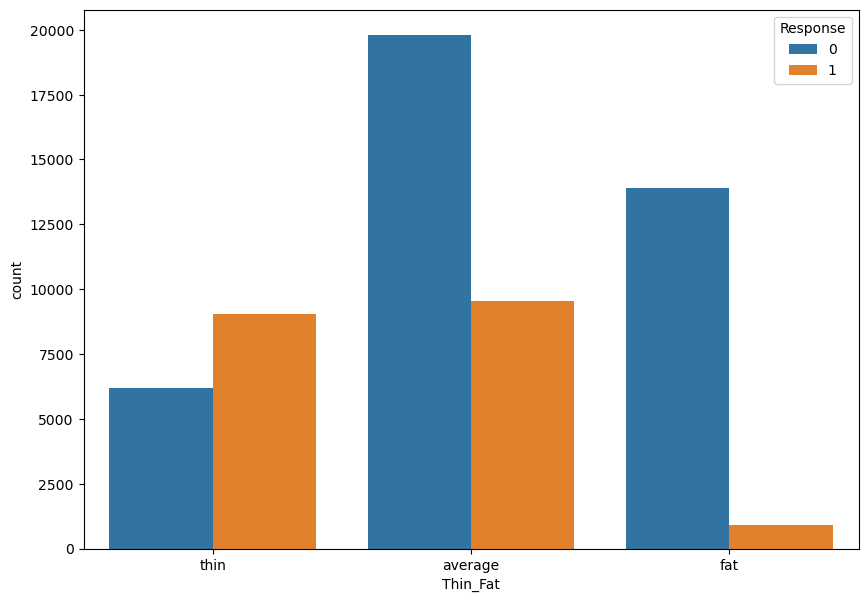

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Thin_Fat', hue = 'Response', data = train)

- Hầu hết các tình trạng thừa cân (Fat lớn) thì sẽ không được chấp nhận hợp đồng nhiều hơn so với các trường hợp còn lại

# Dựa vào 3 đặc điểm chính (BMI, Wt, Ins_Age) phân tích sâu hơn các biến này vì nó liên quan trực tiếp đến việc được chấp nhận hay không

In [32]:
def new_target(row):
    if (row['BMI_Wt']=='overweight') or (row['Old_Young']=='old')  or (row['Thin_Fat']=='fat'):
        val='extremely_risky'
    else:
        val='not_extremely_risky'
    return val

train['extreme_risk'] = train.apply(new_target,axis=1)

<Axes: xlabel='extreme_risk', ylabel='count'>

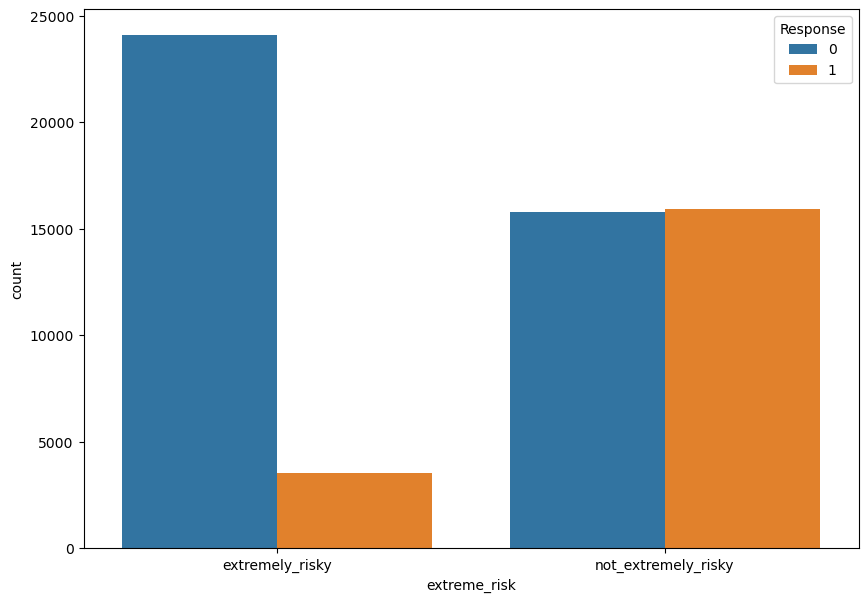

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'extreme_risk', hue = 'Response', data = train)

Hầu hết các trường hợp khách hàng không được chấp nhận hợp đồng vì có rủi ro cao (BMI cao, Wt thừa cân, Tuổi già)

In [34]:
def new_target(row):
    if (row['BMI_Wt']=='average') or (row['Old_Young']=='average')  or (row['Thin_Fat']=='average'):
        val='average'
    else:
        val='non_average'
    return val

train['average_risk'] = train.apply(new_target,axis=1)

<Axes: xlabel='average_risk', ylabel='count'>

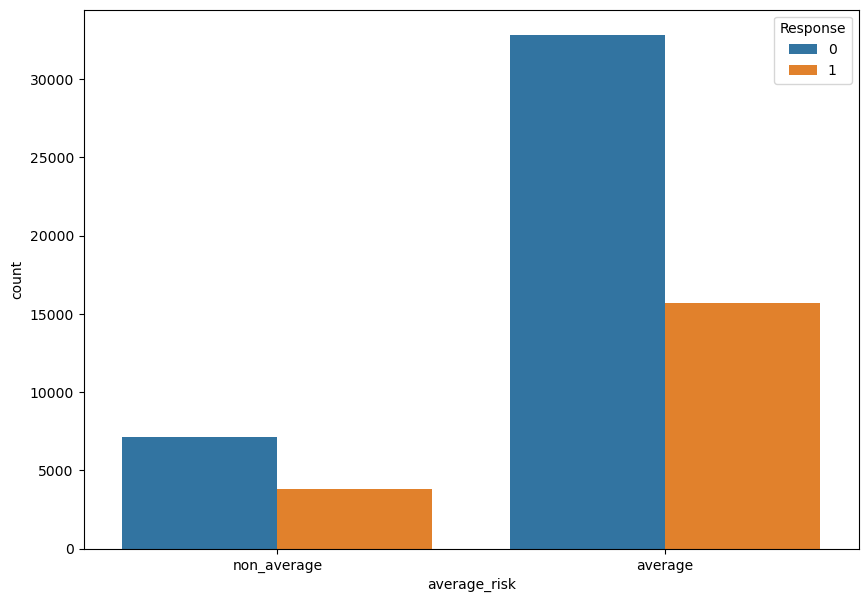

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'average_risk', hue = 'Response', data = train)

In [36]:
def new_target(row):
    if (row['BMI_Wt']=='under_weight') or (row['Old_Young']=='young')  or (row['Thin_Fat']=='thin'):
        val='low_end'
    else:
        val='non_low_end'
    return val

train['low_end_risk'] = train.apply(new_target,axis=1)

<Axes: xlabel='low_end_risk', ylabel='count'>

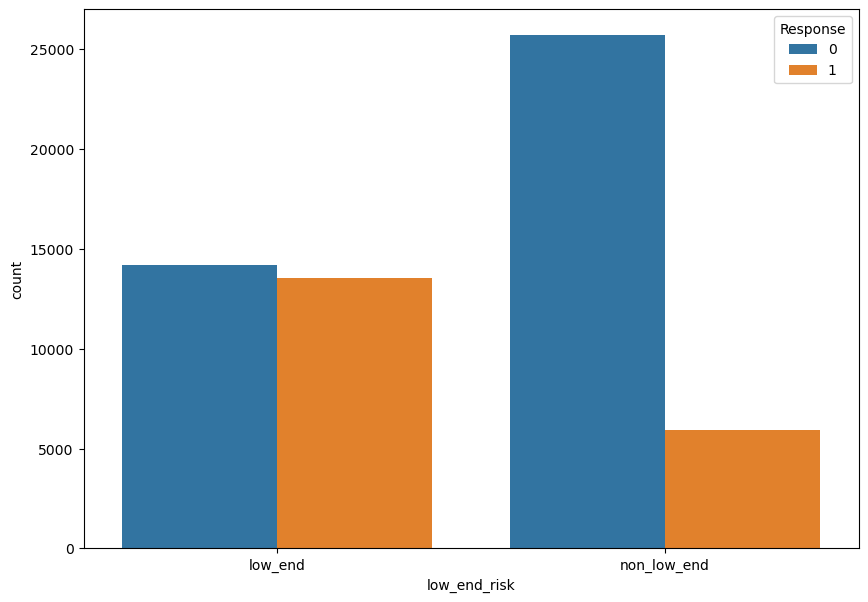

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'low_end_risk', hue = 'Response', data = train)

- Ở rủi ro thấp thì tỉ lệ chấp nhận hợp đồng là gần 50/50
- Ở rủi ro cao hơn thì khả năng chấp nhận hợp đồng là rất ít, tỉ lệ không chấp thuận chiếm tỉ lệ rất cao

C:\Users\Window 11\AppData\Local\Temp\ipykernel_10100\2833380761.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Response']==0]['Product_Info_1'],hist=False,label='Rejected') # Blue Line
C:\Users\Window 11\AppData\Local\Temp\ipykernel_10100\2833380761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

<Axes: xlabel='Product_Info_1', ylabel='Density'>

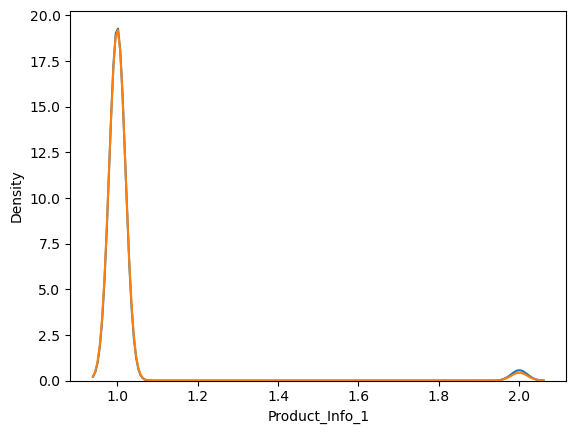

In [38]:
# Kiểm tra mối quan hệ giữa biến Product_Info_1 với biến Response
sns.distplot(train[train['Response']==0]['Product_Info_1'],hist=False,label='Rejected') # Blue Line
sns.distplot(train[train['Response']==1]['Product_Info_1'],hist=False,label='Accepted') # Orange Line

C:\Users\Window 11\AppData\Local\Temp\ipykernel_10100\698418149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Response']==0]['Product_Info_3'],hist=False,label='Rejected')
C:\Users\Window 11\AppData\Local\Temp\ipykernel_10100\698418149.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

<Axes: xlabel='Product_Info_3', ylabel='Density'>

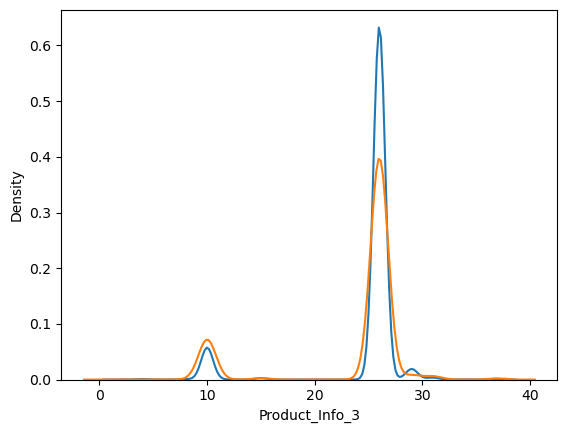

In [39]:
# Kiểm tra mối quan hệ giữa biến Product_Info_3 với biến Response
sns.distplot(train[train['Response']==0]['Product_Info_3'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_3'],hist=False,label='Accepted')

C:\Users\Window 11\AppData\Local\Temp\ipykernel_10100\4117936341.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = abs(variables.corrwith(target, method='pearson')).sort_values(ascending=False)


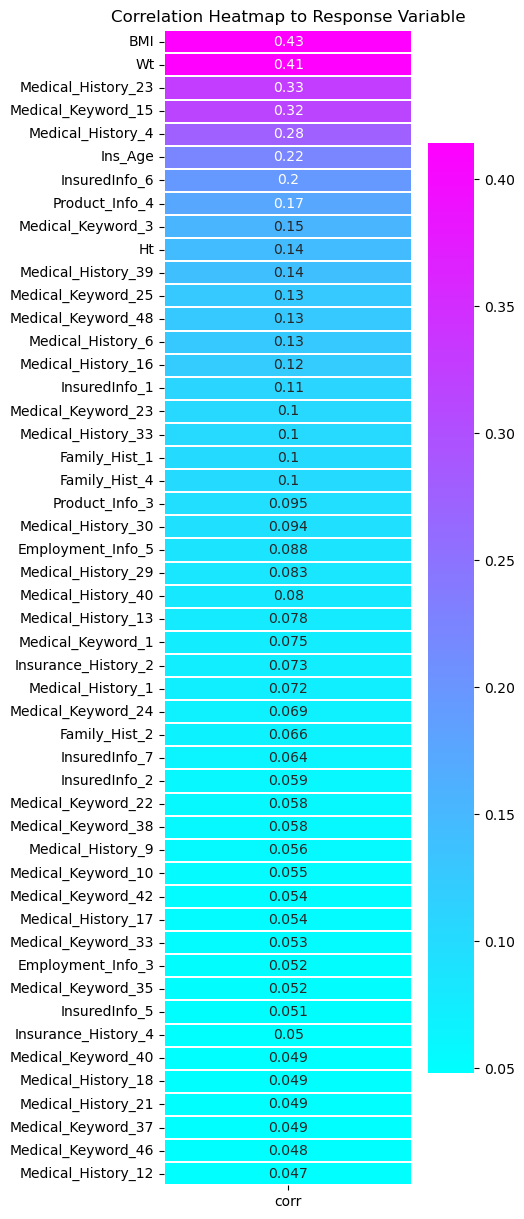

In [40]:
#Ma trận tương quan giữa các biến với Response
variables = train[[i for i in train.columns if i not in ('Id', 'Response')]]
target = train['Response']

# Giá trị tuyệt đối của hệ số tương quan
corr_matrix = abs(variables.corrwith(target, method='pearson')).sort_values(ascending=False)
correlation_matrix = pd.DataFrame({'corr':corr_matrix})
top_50_corr = correlation_matrix[0:50]

# tạo heatmap của ma trận tương quan tuyệt đối 50 biến hàng đầu
plt.figure(figsize=(4, 15))
sns.heatmap(data = top_50_corr, robust= True, annot=True, fmt= '.2g', 
                cmap='cool', linewidths=0.01, linecolor= 'white')
plt.title("Correlation Heatmap to Response Variable")
plt.show()

- 5 biến quan trọng nhất đối với biến Response
    - BMI : 0,43
    - Wt : 0,41
    - Medical_History_23 :0,33
    - Medical_Keyword_15 : 0,32
    - Medical_History_4: 0,28
    
          -> Chọn 5 biến này để đào tạo mô hình tốt nhất dự đoạn rủi ro bảo hiểm

# Mô hình Logistic Regression

In [41]:
X = train[['BMI', 'Wt', 'Medical_History_23','Medical_Keyword_15', 'Medical_History_4']]
y = train['Response']

In [42]:
# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

# Huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

array([[-9.25189123, -2.62925828,  0.47015017, -2.30454094,  1.3739674 ]])

In [43]:
# Đánh giá kết quả mô hình
predictions1 = model.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, predictions1))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions1))

Accuracy score: 0.7830479932641032
Confusion matrix:
[[10211  1752]
 [ 2113  3739]]


Đối với tệp test
- Mô hình này dự đoán đúng 78%
- Confusion matrix
    - Dự đoán đúng số người được chấp nhận hợp đồng là 3739
    - Dự đoán đúng số người không chấp nhận hợp đồng là 10211
    - Dụ đoán sai số người được chấp nhận hợp đồng là 1752
    - Dự đoán sai số người không được chấp nhận hợp đồng là 2113

In [44]:
# Đánh giá kết quả mô hình
predictions = model.predict(X_train)
print('Accuracy score:', accuracy_score(y_train, predictions))
print('Confusion matrix:')
print(confusion_matrix(y_train, predictions))

Accuracy score: 0.7854255882211423
Confusion matrix:
[[23983  3946]
 [ 4973  8664]]


Đối với tệp train
- Mô hình này dự đoán đúng 78%
- Confusion matrix
    - Dự đoán đúng số người được chấp nhận hợp đồng là 8664
    - Dự đoán đúng số người không chấp nhận hợp đồng là 23983
    - Dụ đoán sai số người được chấp nhận hợp đồng là 3946
    - Dự đoán sai số người không được chấp nhận hợp đồng là 4973

Text(0.5, 427.9555555555555, 'Predicted label')

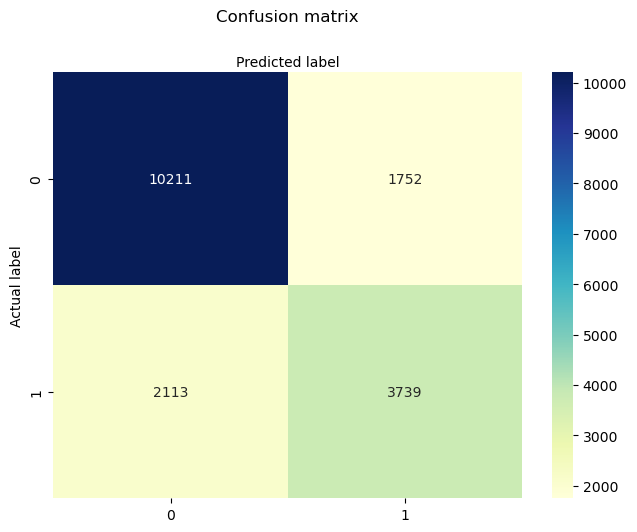

In [45]:
# Trực quan bằng heatmap tệp test
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(y_test, predictions1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

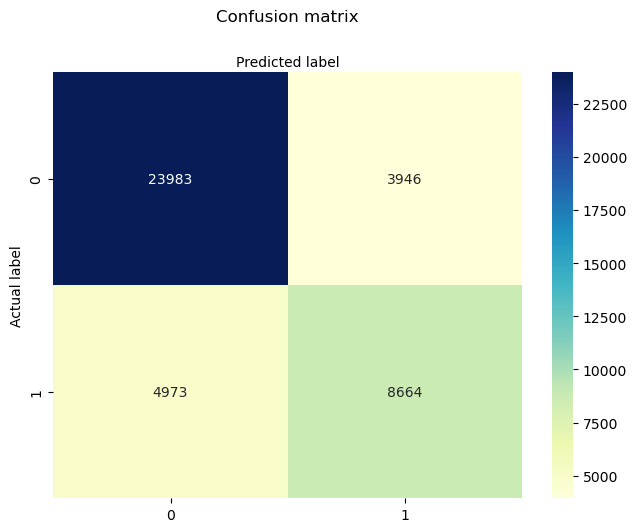

In [46]:
#Trực quan bằng heatmap cho tệp train
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(y_train, predictions)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

In [48]:
target_names = ['not approved', 'approved']
print(classification_report(y_test, predictions1, target_names=target_names))
y_pred = model.predict(X_test)

print("\nDiện tích dưới đường cong ROC (AUC):", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

not approved       0.83      0.85      0.84     11963
    approved       0.68      0.64      0.66      5852

    accuracy                           0.78     17815
   macro avg       0.75      0.75      0.75     17815
weighted avg       0.78      0.78      0.78     17815


Diện tích dưới đường cong ROC (AUC): 0.8543831375951905


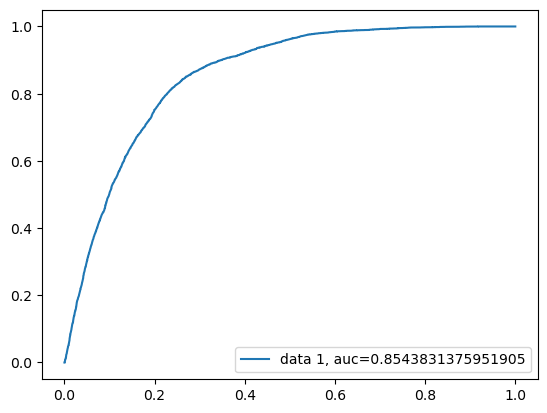

In [49]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Báo cáo phân loại
- Mô hình dự đoán chính xác not approved là 0,83 và approved là 0,68
- Tỉ lệ mà mô hình dự đoán đúng các trường hợp not approved là 0,85 và approved là 0,64
- Tỉ lệ các dự đoán đúng là 0,78
# Diện tích dưới đường cong ROC:
- AUC càng cao thì khả năng phân loại của mô hình càng tốt
- Có AUC là 0,854, cho thấy mô hình có khả năng tốt trong việc phân loại not approved và approved

# Áp mô hình vào tệp test

In [56]:
a= test[['BMI', 'Wt', 'Medical_History_23','Medical_Keyword_15', 'Medical_History_4']]

In [57]:
Response_test= model.predict(a)
print(Response_test)

[0 0 0 ... 0 0 0]


In [58]:
test['ResponseTest']=Response_test

In [59]:
test.groupby('ResponseTest').count()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
ResponseTest,,,,,,,,,,,,,,,,,,,,,
0,13873,13873,13873,13873,13873,13873,13873,13873,13873,13873,...,13873,13873,13873,13873,13873,13873,13873,13873,13873,13873
1,5892,5892,5892,5892,5892,5892,5892,5892,5892,5892,...,5892,5892,5892,5892,5892,5892,5892,5892,5892,5892


# Nhận xét
- Khi kiểm tra trên tệp test ta thấy:
    - Nhóm 0: 13873 trường hợp
    - Nhóm 1: 5892 trường hợp

# Mô hình KNN

In [50]:
# Phân chia dữ liệu thành các biến (X) và mục tiêu (y)
X_knn = train[['BMI', 'Wt', 'Medical_History_23','Medical_Keyword_15', 'Medical_History_4']]
#X = train.drop('Response', axis =1)
y_knn = train['Response']

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3)

# Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

In [51]:
# Tạo mô hình KNN với 27 neighbors
knn = KNeighborsClassifier(n_neighbors=27)

In [52]:
# Huấn luyện mô hình trên tập train
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=27)

In [53]:
# Dự đoán kết quả trên tập test
y_test_pred = knn.predict(X_test_knn)

In [54]:
accuracy = accuracy_score(y_test_knn, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7929834409205726


Đối với tệp test
- Knn cho kết quả đúng 78,9% với k = 27
- Tỉ lệ cao hơn so với Logistic Regression

In [55]:
# Dự đoán kết quả trên tập train
y_train_pred = knn.predict(X_train_knn)
accuracy = accuracy_score(y_train_knn, y_train_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7967569648270221


Đối với tệp train
- Knn cho kết quả đúng lên đến 79,8%
- Tỉ lệ này cao hơn so với tệp test và cả Logistic Regression